### Importação dos dados



In [10]:
import pandas as pd
from matplotlib import pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [11]:
#Dicionario de listas
faturamento = {'Lojas': ['Loja1', 'Loja2', 'Loja3', 'Loja4']}

#Preenche o dicionário
valores = [
    round(sum(loja.Preço)*10**-6,2),
    round(sum(loja2.Preço)*10**-6,2),
    round(sum(loja3.Preço)*10**-6,2),
    round(sum(loja4.Preço)*10**-6,2)

]
faturamento['Faturamentos (MM)'] =valores

# Cria DataFrame
df_faturamento = pd.DataFrame(faturamento)
print(df_faturamento)

   Lojas  Faturamentos (MM)
0  Loja1               1.53
1  Loja2               1.49
2  Loja3               1.46
3  Loja4               1.38


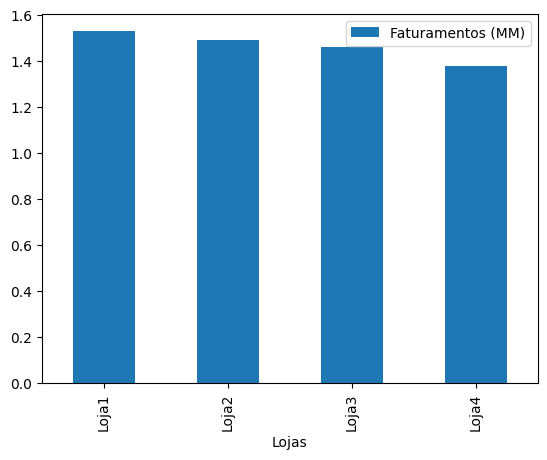

In [12]:

df_faturamento.plot(kind='bar', x= 'Lojas', y='Faturamentos (MM)')
plt.savefig('faturamento_lojas.png')

# 2. Vendas por Categoria

In [13]:
categorias={}

categorias['Loja1'] = loja['Categoria do Produto'].value_counts()
categorias['Loja2'] = loja2['Categoria do Produto'].value_counts()
categorias['Loja3'] = loja3['Categoria do Produto'].value_counts()
categorias['Loja4'] = loja4['Categoria do Produto'].value_counts()
df_categorias = pd.DataFrame(categorias)



2359 2359 2359 2358
                       Loja1  Loja2  Loja3  Loja4
Categoria do Produto                             
brinquedos               324    313    315    338
eletrodomesticos         312    305    278    254
eletronicos              448    422    451    451
esporte e lazer          284    275    277    277
instrumentos musicais    182    224    177    170
livros                   173    197    185    187
moveis                   465    442    499    480
utilidades domesticas    171    181    177    201


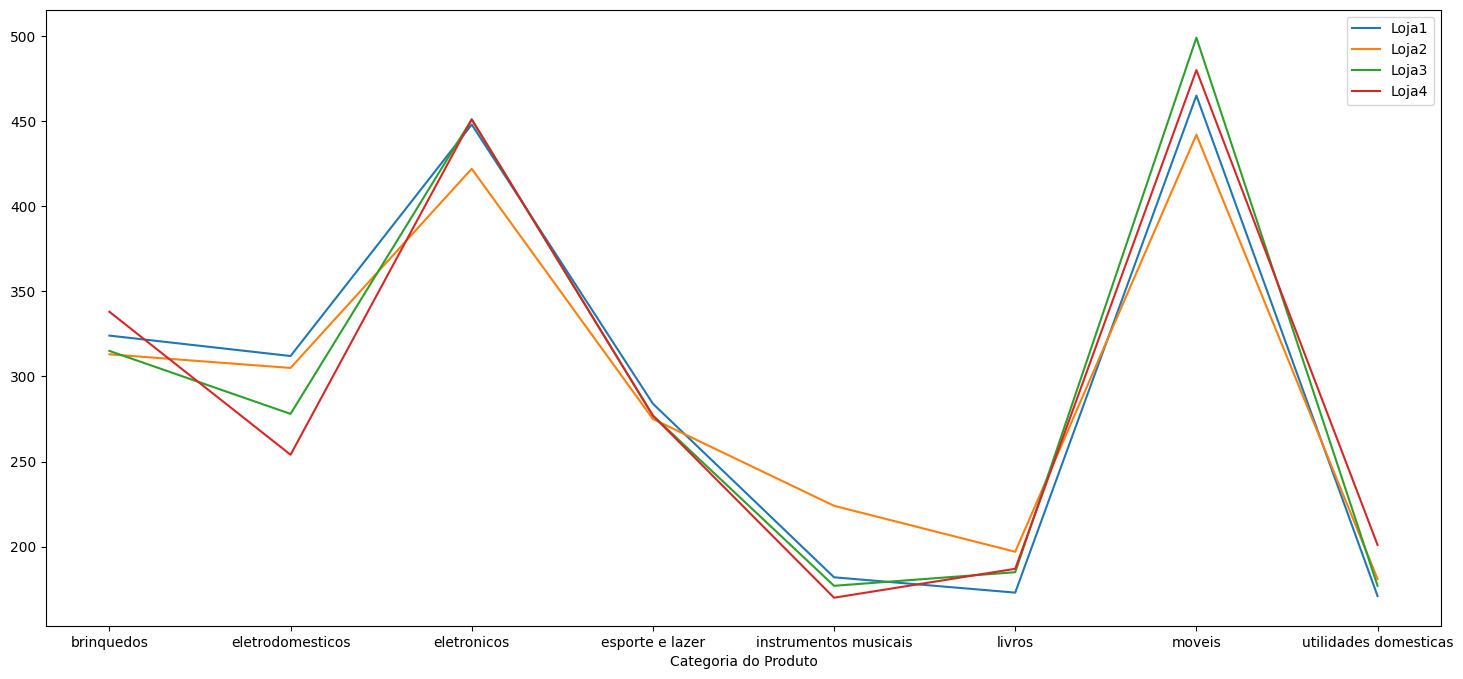

In [14]:
print(sum(df_categorias['Loja1']), sum(df_categorias['Loja2']), sum(df_categorias['Loja3']), sum(df_categorias['Loja4']))
print(df_categorias)
df_categorias.plot(kind='line', figsize=(18,8))
plt.savefig('vendas_por_categorias.png')

# 3. Média de Avaliação das Lojas


In [15]:
avaliacoes = {}
avaliacoes['Lojas'] = ['Loja1', 'Loja2', 'Loja3', 'Loja4']
avaliacoes['Media de Avaliacoes']=[loja['Avaliação da compra'].mean(), loja2['Avaliação da compra'].mean(), loja3['Avaliação da compra'].mean(), loja4['Avaliação da compra'].mean()]
for i in range(len(avaliacoes['Media de Avaliacoes'])):
  avaliacoes['Media de Avaliacoes'][i] = round(avaliacoes['Media de Avaliacoes'][i],2)

df_avaliacoes = pd.DataFrame(avaliacoes)

In [16]:

df_avaliacoes

,Lojas,Media de Avaliacoes
0,Loja1,3.98
1,Loja2,4.04
2,Loja3,4.05
3,Loja4,4.00


# 4. Produtos Mais e Menos Vendidos

In [17]:

def tabela(loja, n):
  mais_vendidos = {'Produto':loja['Produto'].value_counts().head().to_dict().keys(), 'Quantidade':loja['Produto'].value_counts().head().to_dict().values()}
  menos_vendidos = {'Produto':loja['Produto'].value_counts().tail().to_dict().keys(), 'Quantidade':loja['Produto'].value_counts().tail().to_dict().values()}
  print(f'====> Vendas Loja {n}:')
  print(sum(mais_vendidos['Quantidade'])/5, sum(menos_vendidos['Quantidade'])/5, '\n')
  print(f'   Mais vendidos: \n {pd.DataFrame(mais_vendidos)} \n\n Menos vendidos: \n {pd.DataFrame(menos_vendidos)} \n\n')


In [18]:
tabela(loja, 1)
tabela(loja2, 2)
tabela(loja3, 3)
tabela(loja4, 4)

====> Vendas Loja 1:
58.8 35.2 

   Mais vendidos: 
               Produto  Quantidade
0         Micro-ondas          60
1       TV Led UHD 4K          60
2       Guarda roupas          60
3  Secadora de roupas          58
4              Cômoda          56 

 Menos vendidos: 
                        Produto  Quantidade
0  Ciência de dados com python          39
1                     Pandeiro          36
2            Panela de pressão          35
3                      Headset          33
4                 Celular ABXY          33 


====> Vendas Loja 2:
60.8 34.4 

   Mais vendidos: 
                     Produto  Quantidade
0  Iniciando em programação          65
1               Micro-ondas          62
2                   Bateria          61
3                    Violão          58
4                  Pandeiro          58 

 Menos vendidos: 
              Produto  Quantidade
0     Fone de ouvido          37
1           Poltrona          35
2     Mesa de jantar          34
3         Impre

# 5. Frete Médio por Loja

In [19]:
frete_medio = {'Lojas': ['Loja1', 'Loja2', 'Loja3', 'Loja4'], 'Média': [round(loja.Frete.mean(),2), round(loja2.Frete.mean(),2), round(loja3.Frete.mean(),2), round(loja4.Frete.mean(),2)]  }


In [20]:
pd.DataFrame(frete_medio)

,Lojas,Média
0,Loja1,34.69
1,Loja2,33.62
2,Loja3,33.07
3,Loja4,31.28


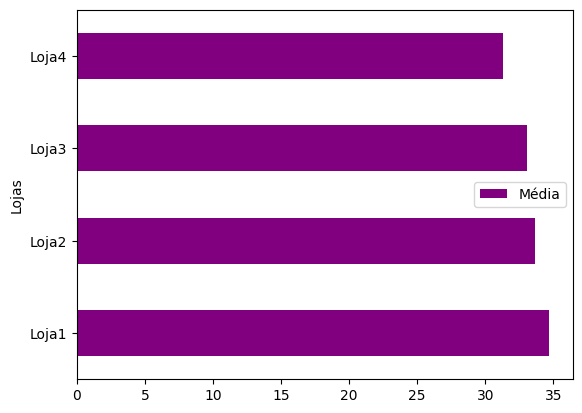

In [24]:
pd.DataFrame(frete_medio).plot(kind='barh', color='purple', x='Lojas', y='Média')
plt.savefig('frete_medio.png')

# Análise das lojas:
  Esta análise tem como objetivo analisar o desempenho de 4 lojas e recomendar qual deve ser vendida com base nos dados obtidos, explicando o motivo e mostrando gráficos. Os fatores analisados são: O faturamento total das lojas (em milhão), as categorias de produtos mais e menos vendidas, a média das avaliações de clientes por loja, os produtos mais e menos vendidos, o frete médio de cada loja.

#### Resultados obtidos:

 * A Loja1 é a que mais lucra, seguido de Loja2, Loja3 e por fim a Loja4 com o menor lucro de vendas.

 * Diante as médias de vendas por categorias, a Loja4 é a unica abaixo da média.

 * A Loja1 e Loja4 têm avaliações muito próximas, porém ambas abaixo da Loja2 e Loja3.

 * Sobre o frete médio, destaca-se a Loja4 com menor frete, seguido da Loja3, Loja2 e Loja1, respectivamente.

 * As médias de maiores vendas de produtos são: em primeiro Loja2 , seguido de Loja1, Loja 4 e por último Loja3.

 * As médias de 5 menores vendas de produtos são: em primeiro Loja3, seguido de Loja4, Loja1, por fim Loja2.

## Considerações finais:
  Durante a análise do desempenho das lojas, percebe-se que a Loja2 e Loja3 mantém uma posição mediana na maioria das análises.

  A Loja1 e Loja4 variam bastante no desempenho, uma vez em primeiro e outra em último, o que afeta negativamente devido à inconsistência geral. No entando a Loja1 vende e lucra mais que a Loja4.

  Com base nos dados e considerando o lucro como fator essencial a recomenda-se a Loja4, pois lucra menos e oscila muito na sua pontuação por tópicos.
